In [20]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#reading data from csv file
dataset=pd.read_csv("student_scores - student_scores.csv")

In [33]:
#Check the dataset dimensions
dataset.shape
#the output is in format (rows,columns)

(25, 2)

In [35]:
#check how the dataset actually looks
dataset.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [38]:
#to check the stastical details of the dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Percentage Scored')

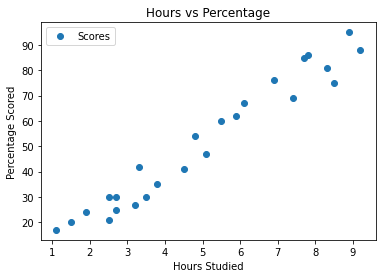

In [22]:
#plotting graphs for better understanding
dataset.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.grid(True)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

In [85]:
#dividing the data into attributes and labels
label=dataset.iloc[:, 1].values  #percentage
attribute=dataset.iloc[:, :-1].values  #hours
label,attribute

(array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64),
 array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]))

In [86]:
#split the dataset into training and test set
from sklearn.model_selection import train_test_split
label_train,label_test,attribute_train,attribute_test=train_test_split(label,attribute,test_size=0.25,random_state=40,shuffle=True)

In [88]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(attribute_train,label_train)

print('<<<Training Complete>>>')

<<<Training Complete>>>


In [96]:
#As linear regression algorithm basiclly calculates the slope and intercept of the regression line
#The predicted intercept
print(f"Predicted Intercept:{regressor.intercept_}")
# The predicted slope(coefficient of x)
print(f"Predicted Slope: {regressor.coef_}")

Predicted Intercept:0.1563257200808863
Predicted Slope: [10.13396571]


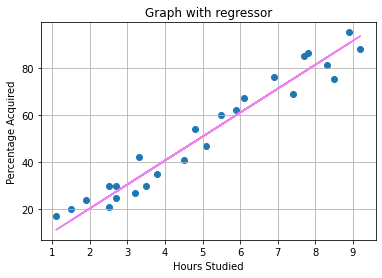

In [117]:
#Plotting the regression line
line=regressor.coef_*attribute+regressor.intercept_

#Plotting for the test data
plt.title('Graph with regressor')
plt.scatter(attribute,label)
plt.grid(True)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Acquired')
plt.plot(attribute,line,color='violet');
plt.show()

In [125]:
#Making predictions
print("Attribute data",attribute_test)  #test data
label_predict=regressor.predict(attribute_test)
print("Predicted label",label_predict) #

Attribute data [[8.9]
 [7.8]
 [1.1]
 [7.4]
 [3.3]
 [8.5]
 [4.8]]
Predicted label [90.34862057 79.20125828 11.303688   75.147672   33.59841257 86.29503428
 48.79936114]


In [126]:
#Comparing actual vs predicted
df=pd.DataFrame({'Actual':label_test,"Predicted":label_predict})
df

,Actual,Predicted
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [128]:
#Testing our own data
hours=np.array(int(input("Enter study time to predict percentage: "))).reshape(-1,1)
own_pred=regressor.predict(hours)
print(f"Study time(in hours): {hours}  Predicted Percentage:{own_pred}")

Enter study time to predict percentage: 4
Study time(in hours): [[4]]  Predicted Percentage:[40.69218857]


In [131]:
#Error calculation for our model
from sklearn import metrics
#Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(label_test,label_predict))
#Mean squared error
print('Mean Squared Error:',metrics.mean_squared_error(label_test,label_predict))
#Root mean squared error
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(label_test,label_predict)))

Mean Absolute Error: 6.8844808156275406
Mean Squared Error: 51.90159659147337
Root Mean Squared Error: 7.20427627117904
